In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split  # train test data
from sklearn.linear_model import LinearRegression  # import prediction model
from sklearn.metrics import mean_squared_error # evaluation of model
from collections import OrderedDict # dict subclass that remembers theorder entries were added
import seaborn as sns
#%matplotlib inline

In [152]:
# Importing the dataset
df = pd.read_excel('./Folkhalsomyndigheten_Covid19.xlsx')
df = df[(df['ID'] > 332)]
df.head()

,ID,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
332,333,2021-01-01,2618,31,20,20,33,18,3,25,...,239,5,85,12,13,13,68,716,70,138
333,334,2021-01-02,2532,20,9,9,27,44,7,23,...,760,40,128,14,36,4,0,949,92,55
334,335,2021-01-03,2755,184,211,7,10,30,95,272,...,161,97,78,111,7,163,4,813,84,67
335,336,2021-01-04,6984,11,28,23,263,930,9,50,...,1094,59,83,15,180,40,249,651,152,420
336,337,2021-01-05,7546,284,236,36,303,431,119,432,...,1314,297,314,89,142,238,171,725,116,267


In [153]:
df.shape

(41, 24)

In [148]:
df.columns

Index(['ID', 'Statistikdatum', 'Totalt_antal_fall', 'Blekinge', 'Dalarna',
       'Gotland', 'Gävleborg', 'Halland', 'Jämtland_Härjedalen', 'Jönköping',
       'Kalmar', 'Kronoberg', 'Norrbotten', 'Skåne', 'Stockholm', 'Sörmland',
       'Uppsala', 'Värmland', 'Västerbotten', 'Västernorrland', 'Västmanland',
       'Västra_Götaland', 'Örebro', 'Östergötland'],
      dtype='object')

In [149]:
df.isnull().sum()

ID                     0
Statistikdatum         0
Totalt_antal_fall      0
Blekinge               0
Dalarna                0
Gotland                0
Gävleborg              0
Halland                0
Jämtland_Härjedalen    0
Jönköping              0
Kalmar                 0
Kronoberg              0
Norrbotten             0
Skåne                  0
Stockholm              0
Sörmland               0
Uppsala                0
Värmland               0
Västerbotten           0
Västernorrland         0
Västmanland            0
Västra_Götaland        0
Örebro                 0
Östergötland           0
dtype: int64

In [150]:
df.describe()

,ID,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,353.000000,3653.951220,61.682927,70.219512,9.560976,93.000000,191.487805,39.024390,152.829268,84.829268,...,561.146341,67.073171,104.121951,48.878049,79.365854,82.853659,77.585366,727.268293,78.780488,160.951220
std,11.979149,1716.234103,66.903452,59.179605,9.726379,72.628851,173.757463,32.946538,107.783557,56.427344,...,313.037982,56.584181,61.561025,32.811732,70.325940,58.934523,69.980703,363.153482,37.215260,93.335404
min,333.000000,1013.000000,1.000000,4.000000,0.000000,6.000000,10.000000,0.000000,7.000000,12.000000,...,117.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,153.000000,28.000000,38.000000
25%,343.000000,2339.000000,18.000000,20.000000,2.000000,33.000000,44.000000,10.000000,30.000000,38.000000,...,289.000000,33.000000,57.000000,15.000000,13.000000,44.000000,17.000000,439.000000,51.000000,96.000000
50%,353.000000,3741.000000,37.000000,58.000000,7.000000,86.000000,190.000000,36.000000,168.000000,78.000000,...,545.000000,59.000000,98.000000,44.000000,68.000000,79.000000,65.000000,725.000000,70.000000,144.000000
75%,363.000000,4737.000000,84.000000,101.000000,13.000000,139.000000,267.000000,49.000000,213.000000,110.000000,...,760.000000,93.000000,136.000000,69.000000,115.000000,111.000000,111.000000,924.000000,100.000000,194.000000
max,373.000000,7546.000000,284.000000,236.000000,36.000000,303.000000,930.000000,119.000000,432.000000,254.000000,...,1314.000000,297.000000,314.000000,130.000000,323.000000,239.000000,323.000000,2056.000000,176.000000,427.000000


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 332 to 372
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   41 non-null     int64         
 1   Statistikdatum       41 non-null     datetime64[ns]
 2   Totalt_antal_fall    41 non-null     int64         
 3   Blekinge             41 non-null     int64         
 4   Dalarna              41 non-null     int64         
 5   Gotland              41 non-null     int64         
 6   Gävleborg            41 non-null     int64         
 7   Halland              41 non-null     int64         
 8   Jämtland_Härjedalen  41 non-null     int64         
 9   Jönköping            41 non-null     int64         
 10  Kalmar               41 non-null     int64         
 11  Kronoberg            41 non-null     int64         
 12  Norrbotten           41 non-null     int64         
 13  Skåne                41 non-null  

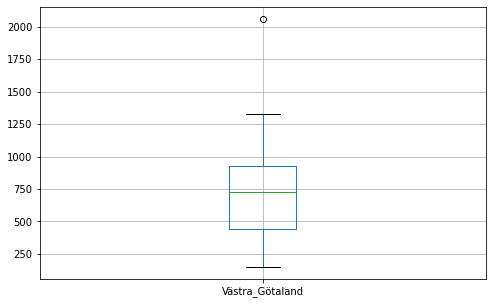

In [140]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(column ='Västra_Götaland')

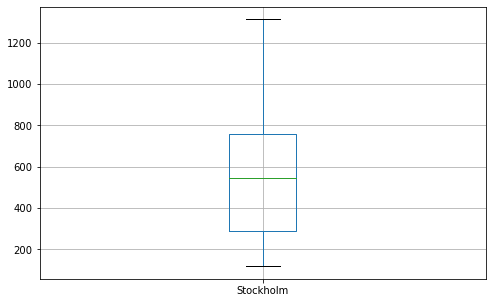

In [141]:
fig, ax = plt.subplots(figsize=(8,5))
df.boxplot(column ='Stockholm')

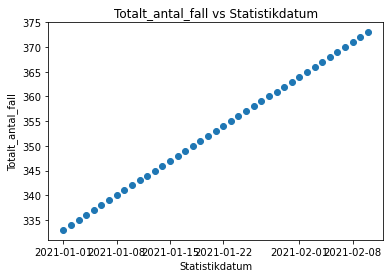

<Figure size 432x288 with 0 Axes>

In [142]:
plt.scatter(df.Statistikdatum, df.ID)
plt.title('Totalt_antal_fall vs Statistikdatum')
plt.xlabel('Statistikdatum')
plt.ylabel('Totalt_antal_fall')
plt.show()
sns.despine()

In [143]:
df.Västra_Götaland.value_counts()

1052    1
670     1
924     1
731     1
985     1
1181    1
278     1
725     1
404     1
200     1
1170    1
400     1
975     1
753     1
716     1
651     1
2056    1
707     1
770     1
413     1
241     1
1329    1
789     1
827     1
1278    1
439     1
310     1
949     1
153     1
755     1
847     1
432     1
813     1
939     1
554     1
808     1
614     1
485     1
501     1
673     1
321     1
Name: Västra_Götaland, dtype: int64

In [154]:
df.shape

(41, 24)